# Adult comparison

Comparing the results on the Attacks on Adult using the `KClosestVotingClassifier`

In [1]:
from pathlib import Path
import sys
from numba import njit

UTILS_RELATIVE_PATH = "../../../../"
sys.path.append(UTILS_RELATIVE_PATH)

MLEM_RELATIVE_PATH = "../../../../.."
sys.path.append(MLEM_RELATIVE_PATH)

LIME_RELATIVE_PATH = "../../../../../lime/"
sys.path.append(LIME_RELATIVE_PATH)

import logging
logging.disable('DEBUG')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from mlem.ensemble import KClosestVotingClassifier
from utils.attack_evaluation import evaluate_attack_distances
from utils.models import load_pickle_bz2
from utils.dataloading.attack_models import load_attack_models

# Loading the Adult data

In [3]:
from utils.dataloading.adult import load_adult_data, load_adult_randomforest # type: ignore

BB = load_adult_randomforest()
BB_DATA = load_adult_data()

print(classification_report(BB_DATA['y_test'], BB.predict(BB_DATA['X_test'])))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8157
           1       0.79      0.61      0.69      2690

    accuracy                           0.86     10847
   macro avg       0.84      0.78      0.80     10847
weighted avg       0.86      0.86      0.86     10847



##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `False`
Here the attack dataset is the same used to train the Decision Trees

In [4]:
PATH = Path('../../decision_tree_dataset_no3std/adult/experiment_output/')
assert PATH.exists()

In [5]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [6]:
from typing import List, Sequence

import numpy as np
from numpy import ndarray
from numpy.core.fromnumeric import argmax
from numpy.core.shape_base import vstack
from sklearn.base import RegressorMixin
import scipy.spatial.distance as distance
from collections import Counter

In [7]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

report full
              precision    recall  f1-score   support

          in       0.70      0.67      0.68     25308
         out       0.30      0.33      0.31     10847

    accuracy                           0.57     36155
   macro avg       0.50      0.50      0.50     36155
weighted avg       0.58      0.57      0.57     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.73      0.71     20353
         out       0.30      0.27      0.28      8766

    accuracy                           0.59     29119
   macro avg       0.50      0.50      0.50     29119
weighted avg       0.58      0.59      0.58     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.43      0.54      4955
         out       0.30      0.58      0.40      2081

    accuracy                           0.48      7036
   macro avg       0.51      0.51      0.47      7036
weighted avg       0.59      0.48      0.50 

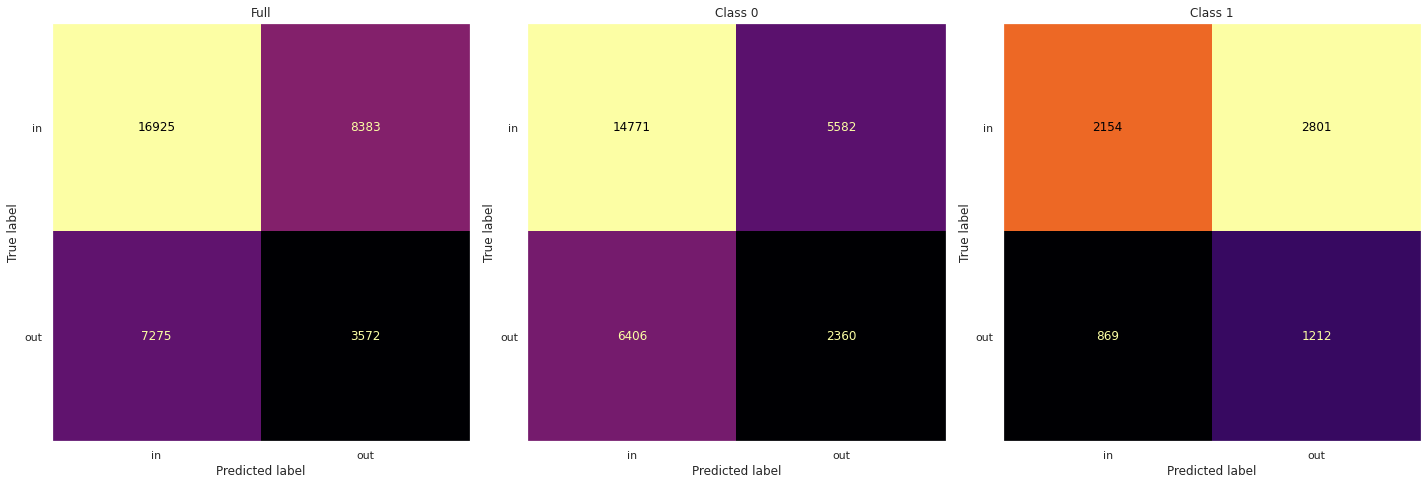

In [8]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `True`

In [9]:
PATH = Path('../../decision_tree_dataset/adult/experiment_output/')
assert PATH.exists()

In [10]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [11]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

report full
              precision    recall  f1-score   support

          in       0.70      0.38      0.49     25308
         out       0.30      0.63      0.41     10847

    accuracy                           0.45     36155
   macro avg       0.50      0.50      0.45     36155
weighted avg       0.58      0.45      0.46     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.35      0.47     20353
         out       0.30      0.65      0.41      8766

    accuracy                           0.44     29119
   macro avg       0.50      0.50      0.44     29119
weighted avg       0.58      0.44      0.45     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.47      0.56      4955
         out       0.30      0.54      0.38      2081

    accuracy                           0.49      7036
   macro avg       0.50      0.50      0.47      7036
weighted avg       0.59      0.49      0.51 

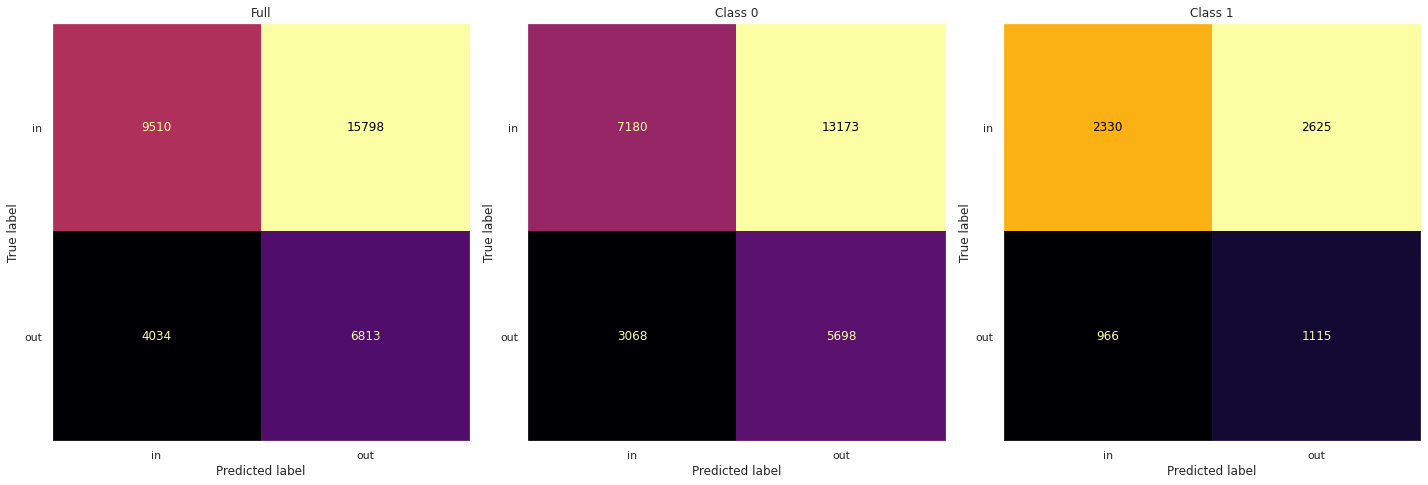

In [12]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [13]:
PATH = Path('../../statistical_no3std/adult/experiment_output/')
assert PATH.exists()

In [14]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [15]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

report full
              precision    recall  f1-score   support

          in       0.70      0.43      0.53     25308
         out       0.30      0.56      0.39     10847

    accuracy                           0.47     36155
   macro avg       0.50      0.50      0.46     36155
weighted avg       0.58      0.47      0.49     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.41      0.52     20353
         out       0.30      0.58      0.40      8766

    accuracy                           0.46     29119
   macro avg       0.50      0.50      0.46     29119
weighted avg       0.58      0.46      0.48     29119


Class 1
              precision    recall  f1-score   support

          in       0.69      0.50      0.58      4955
         out       0.29      0.47      0.36      2081

    accuracy                           0.49      7036
   macro avg       0.49      0.49      0.47      7036
weighted avg       0.57      0.49      0.52 

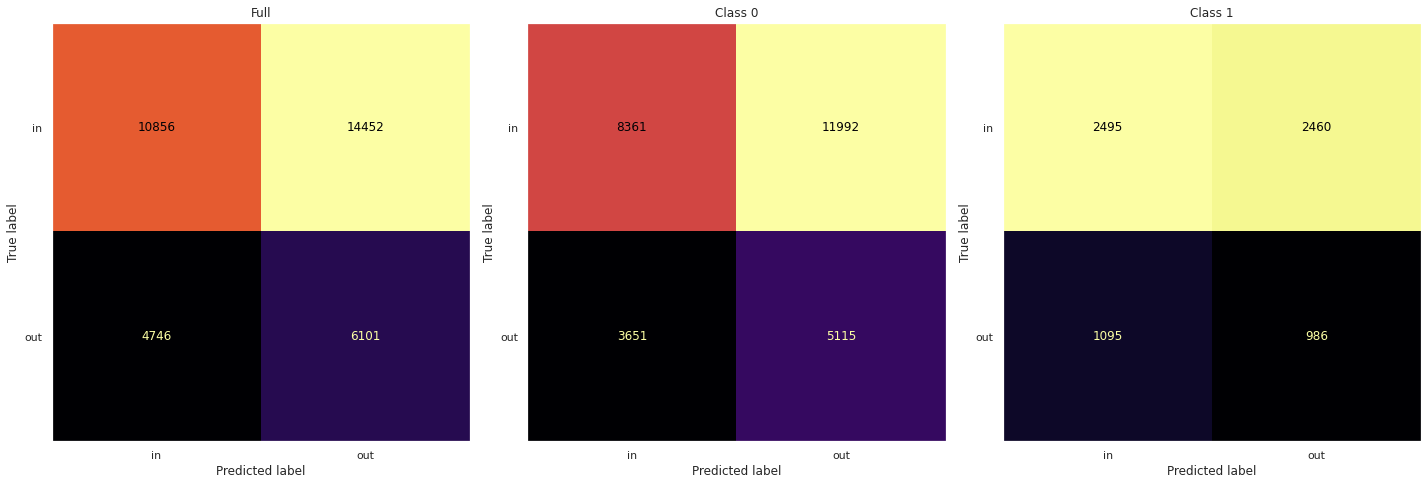

In [16]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True`

Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [17]:
PATH = Path('../../statistical/adult/experiment_output/')
assert PATH.exists()

In [18]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [19]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

report full
              precision    recall  f1-score   support

          in       0.70      0.64      0.67     25308
         out       0.30      0.36      0.33     10847

    accuracy                           0.56     36155
   macro avg       0.50      0.50      0.50     36155
weighted avg       0.58      0.56      0.57     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.63      0.66     20353
         out       0.30      0.38      0.34      8766

    accuracy                           0.55     29119
   macro avg       0.50      0.50      0.50     29119
weighted avg       0.58      0.55      0.56     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.70      0.70      4955
         out       0.30      0.31      0.31      2081

    accuracy                           0.58      7036
   macro avg       0.50      0.50      0.50      7036
weighted avg       0.59      0.58      0.58 

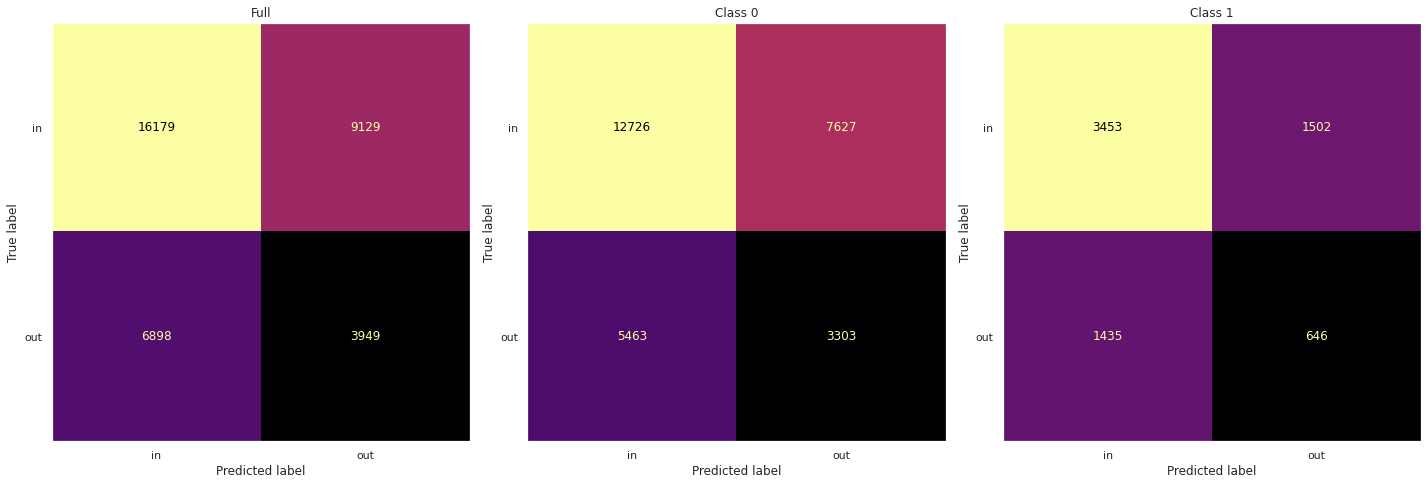

In [20]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [21]:
PATH = Path('../../statistical_noisy/adult/experiment_output/')
assert PATH.exists()

In [22]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [23]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

report full
              precision    recall  f1-score   support

          in       0.70      0.47      0.56     25308
         out       0.30      0.53      0.38     10847

    accuracy                           0.49     36155
   macro avg       0.50      0.50      0.47     36155
weighted avg       0.58      0.49      0.51     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.37      0.49     20353
         out       0.30      0.62      0.40      8766

    accuracy                           0.45     29119
   macro avg       0.50      0.50      0.45     29119
weighted avg       0.58      0.45      0.46     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.87      0.78      4955
         out       0.34      0.15      0.21      2081

    accuracy                           0.66      7036
   macro avg       0.52      0.51      0.50      7036
weighted avg       0.60      0.66      0.61 

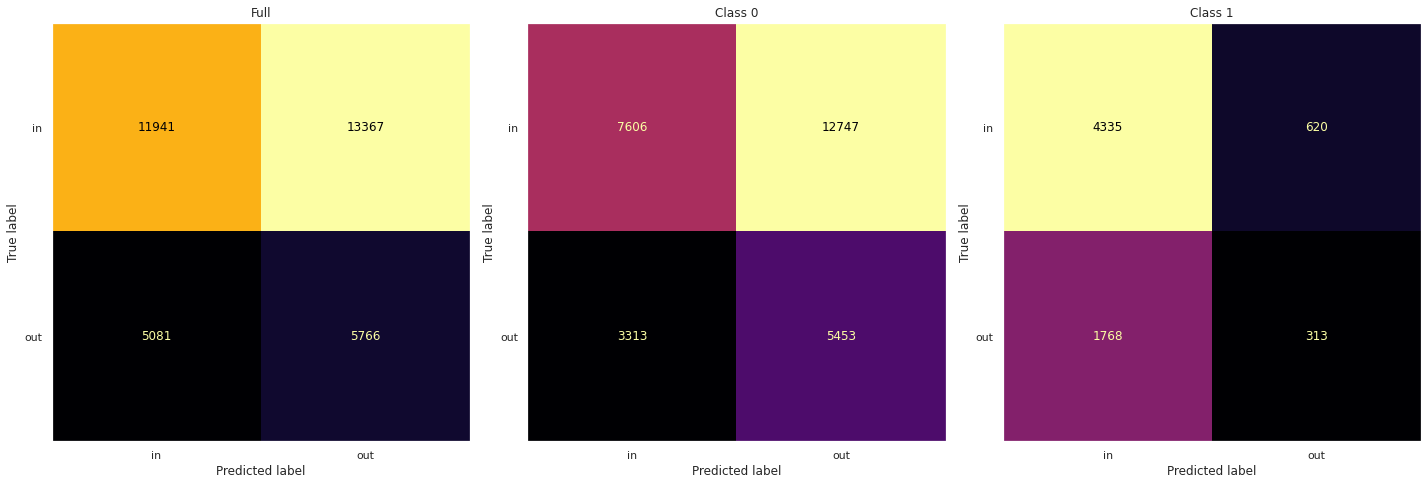

In [24]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [25]:
PATH = Path('../../statistical_noisy_filter/adult/experiment_output/')
assert PATH.exists()

In [26]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [27]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

report full
              precision    recall  f1-score   support

          in       0.70      0.47      0.56     25308
         out       0.30      0.54      0.39     10847

    accuracy                           0.49     36155
   macro avg       0.50      0.50      0.47     36155
weighted avg       0.58      0.49      0.51     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.42      0.52     20353
         out       0.30      0.58      0.40      8766

    accuracy                           0.47     29119
   macro avg       0.50      0.50      0.46     29119
weighted avg       0.58      0.47      0.49     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.65      0.68      4955
         out       0.30      0.35      0.32      2081

    accuracy                           0.56      7036
   macro avg       0.50      0.50      0.50      7036
weighted avg       0.58      0.56      0.57 

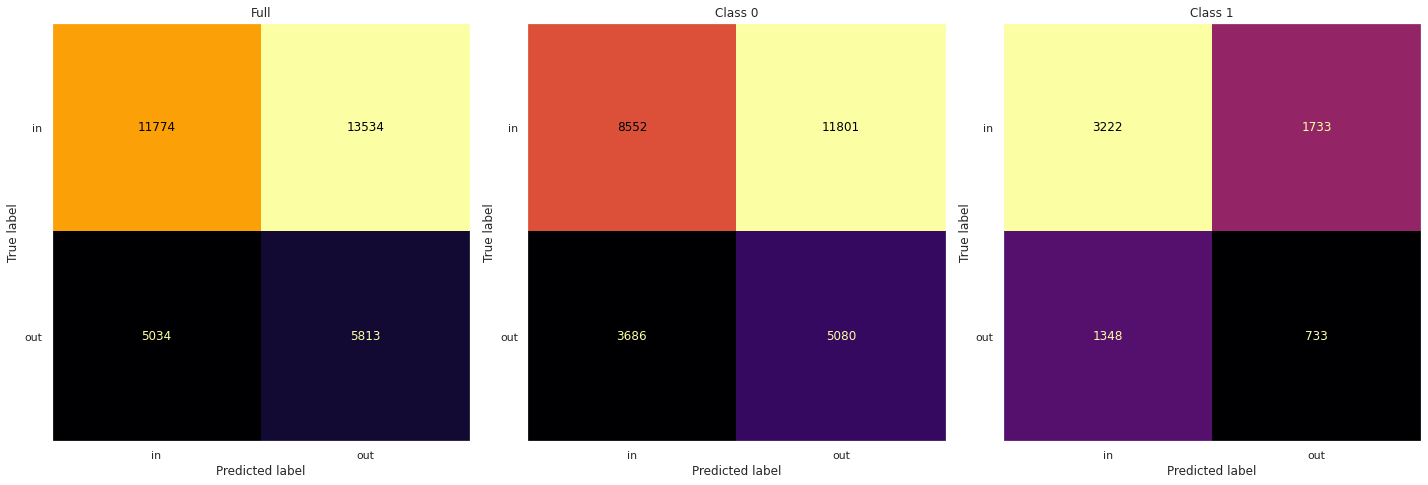

In [28]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `False`

Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [29]:
PATH = Path('../../trepan/noisy/adult/experiment_output/')
assert PATH.exists()

In [30]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [31]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

report full
              precision    recall  f1-score   support

          in       0.70      0.67      0.68     25308
         out       0.30      0.34      0.32     10847

    accuracy                           0.57     36155
   macro avg       0.50      0.50      0.50     36155
weighted avg       0.58      0.57      0.57     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.59      0.64     20353
         out       0.30      0.42      0.35      8766

    accuracy                           0.54     29119
   macro avg       0.50      0.50      0.49     29119
weighted avg       0.58      0.54      0.55     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      0.98      0.82      4955
         out       0.22      0.01      0.02      2081

    accuracy                           0.70      7036
   macro avg       0.46      0.50      0.42      7036
weighted avg       0.56      0.70      0.58 

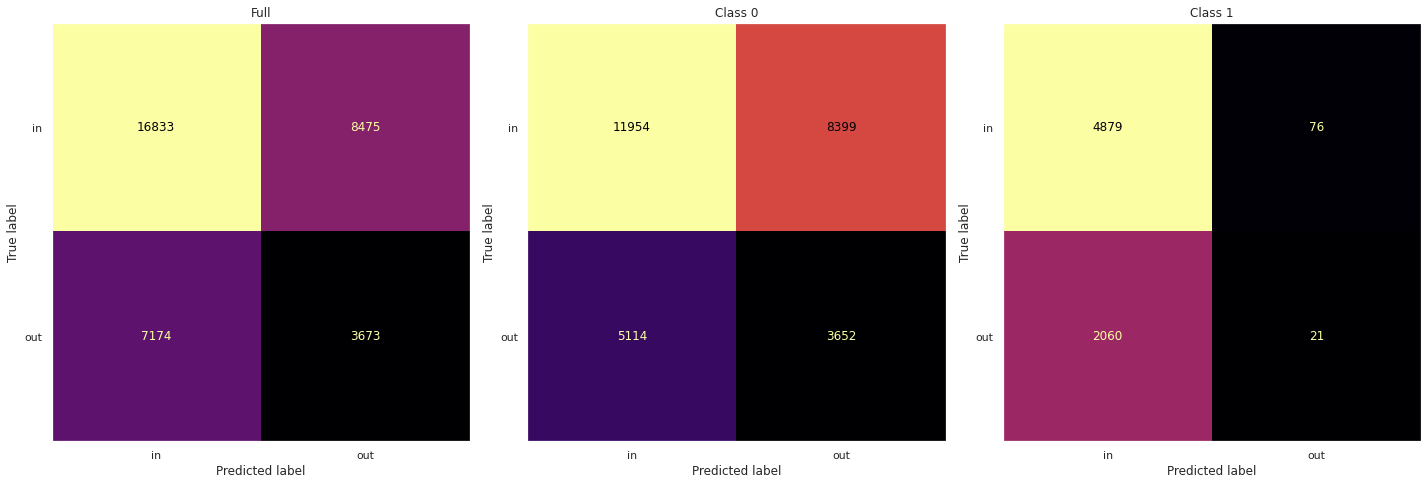

In [32]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `True`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [33]:
PATH = Path('../../trepan/noisy_filtering/adult/experiment_output/')
assert PATH.exists()

In [34]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [35]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

report full
              precision    recall  f1-score   support

          in       0.70      0.56      0.62     25308
         out       0.30      0.44      0.36     10847

    accuracy                           0.52     36155
   macro avg       0.50      0.50      0.49     36155
weighted avg       0.58      0.52      0.54     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.55      0.61     20353
         out       0.30      0.45      0.36      8766

    accuracy                           0.52     29119
   macro avg       0.50      0.50      0.49     29119
weighted avg       0.58      0.52      0.54     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.61      0.65      4955
         out       0.30      0.40      0.35      2081

    accuracy                           0.55      7036
   macro avg       0.51      0.51      0.50      7036
weighted avg       0.59      0.55      0.56 

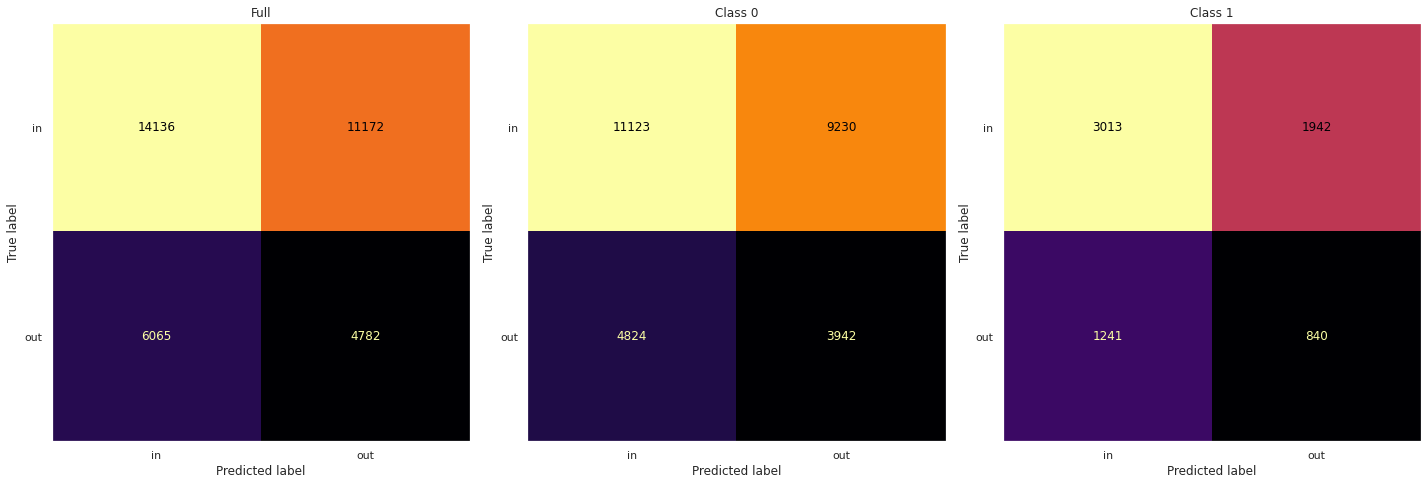

In [36]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `False`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [37]:
PATH = Path('../../trepan/statistical/adult/experiment_output/')
assert PATH.exists()

In [38]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [39]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

report full
              precision    recall  f1-score   support

          in       0.70      0.43      0.53     25308
         out       0.30      0.58      0.40     10847

    accuracy                           0.47     36155
   macro avg       0.50      0.50      0.46     36155
weighted avg       0.58      0.47      0.49     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.46      0.55     20353
         out       0.30      0.55      0.39      8766

    accuracy                           0.48     29119
   macro avg       0.50      0.50      0.47     29119
weighted avg       0.58      0.48      0.50     29119


Class 1
              precision    recall  f1-score   support

          in       0.72      0.31      0.43      4955
         out       0.30      0.71      0.42      2081

    accuracy                           0.43      7036
   macro avg       0.51      0.51      0.43      7036
weighted avg       0.59      0.43      0.43 

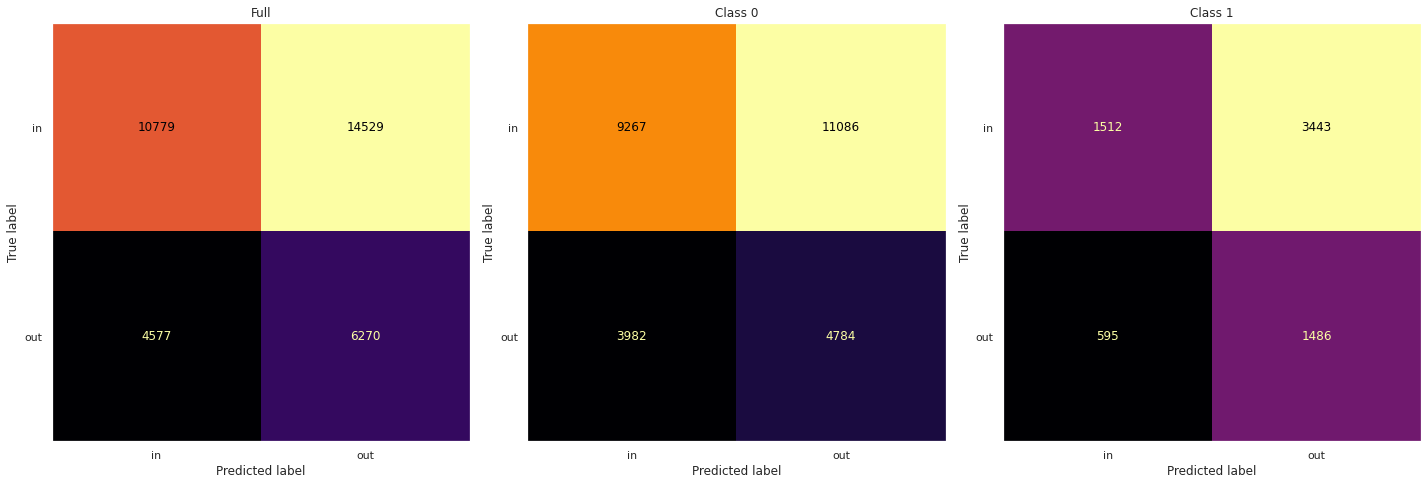

In [40]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `True`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [41]:
PATH = Path('../../trepan/statistical_filtering/adult/experiment_output/')
assert PATH.exists()

In [42]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [43]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

report full
              precision    recall  f1-score   support

          in       0.70      0.45      0.55     25308
         out       0.30      0.55      0.39     10847

    accuracy                           0.48     36155
   macro avg       0.50      0.50      0.47     36155
weighted avg       0.58      0.48      0.50     36155


Class 0
              precision    recall  f1-score   support

          in       0.69      0.39      0.50     20353
         out       0.30      0.60      0.40      8766

    accuracy                           0.46     29119
   macro avg       0.50      0.50      0.45     29119
weighted avg       0.58      0.46      0.47     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.69      0.70      4955
         out       0.30      0.32      0.31      2081

    accuracy                           0.58      7036
   macro avg       0.50      0.51      0.50      7036
weighted avg       0.59      0.58      0.58 

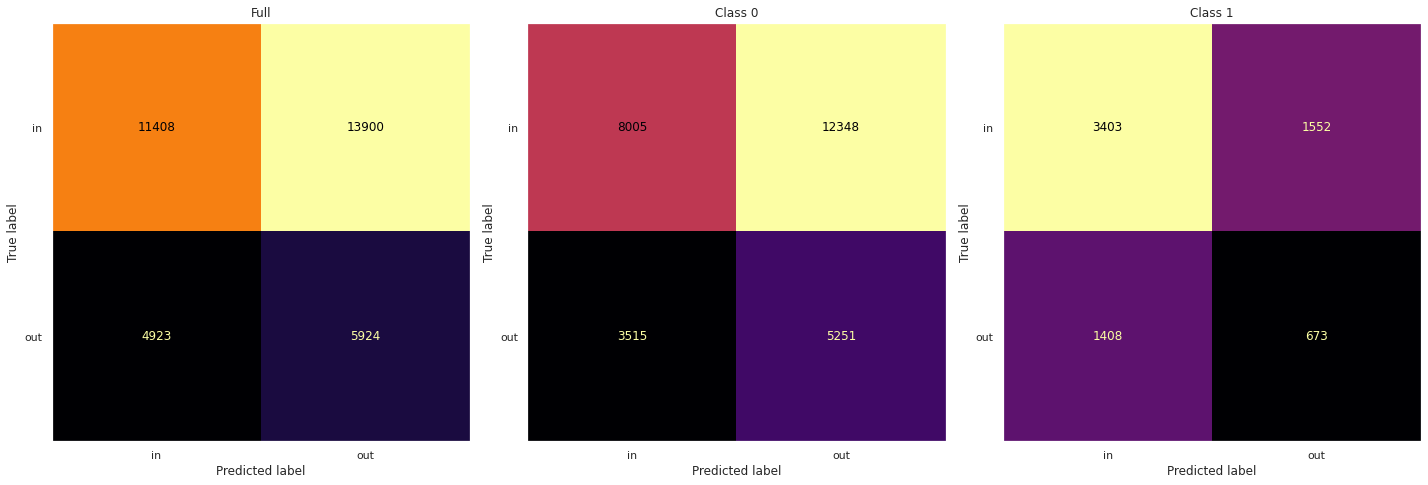

In [44]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `False`

Here I didn't balanced the dataset generated by trepan and for each `Decision Tree` I generated a dataset of $80,000$ elements.

In [45]:
PATH = Path('../../trepan/trepan_statistical_nobalanced/adult/experiment_output/')
assert PATH.exists()

In [46]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [47]:
ensemble0 = KClosestVotingClassifier(attack_0, instances)
ensemble1 = KClosestVotingClassifier(attack_1, instances)

report full
              precision    recall  f1-score   support

          in       0.70      0.60      0.65     25308
         out       0.31      0.41      0.35     10847

    accuracy                           0.54     36155
   macro avg       0.50      0.51      0.50     36155
weighted avg       0.58      0.54      0.56     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.55      0.62     20353
         out       0.30      0.46      0.36      8766

    accuracy                           0.52     29119
   macro avg       0.50      0.50      0.49     29119
weighted avg       0.58      0.52      0.54     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.80      0.75      4955
         out       0.32      0.23      0.27      2081

    accuracy                           0.63      7036
   macro avg       0.52      0.51      0.51      7036
weighted avg       0.60      0.63      0.61 

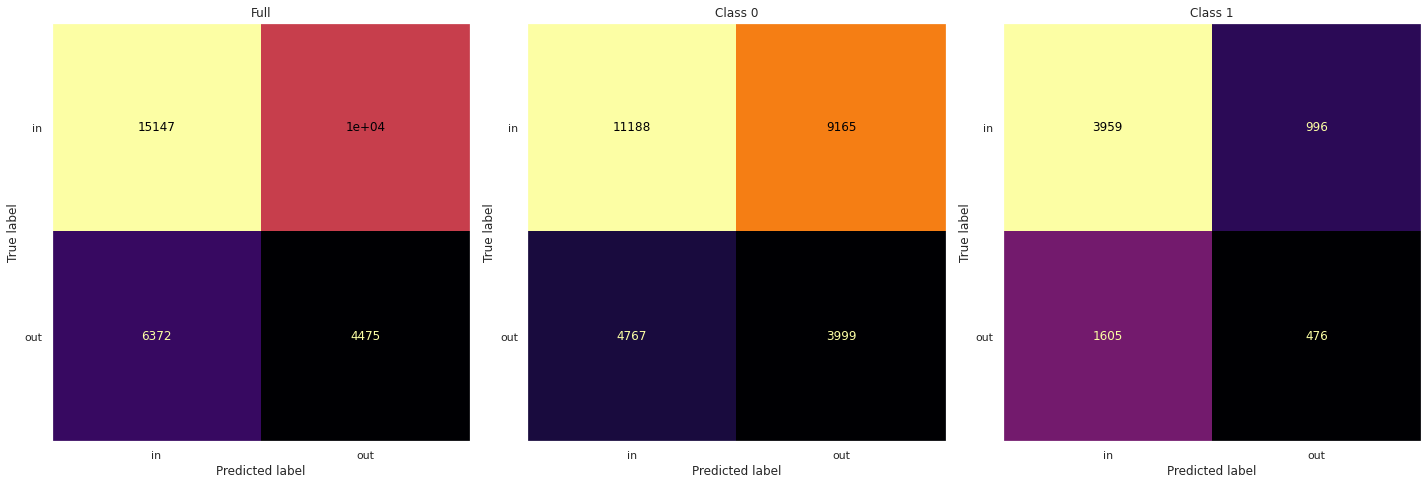

In [48]:
evaluate_attack_distances(ensemble0, ensemble1, BB, BB_DATA)